In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [3]:
# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

In [4]:
# нормализация массива
#def normalize(X, axis=-1, order=2):
#    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
#    l2[l2 == 0] = 1
#    return X / np.expand_dims(l2, axis)

In [5]:
def normalize(X):
    df_scaled = X.copy() 
   
    df_result = (df_scaled-df_scaled.min())/(df_scaled.max()-df_scaled.min())


    return   df_result       


In [6]:
data = pd.DataFrame([
 [-2, -1,1],  # Алиса
  [25, 6,0],   # Боб
  [17, 4,0],   # Чарли
  [-15, -6,1], # Диана
],
columns=["H","W","G"])
print(data) 

    H  W  G
0  -2 -1  1
1  25  6  0
2  17  4  0
3 -15 -6  1


In [7]:
x = pd.DataFrame(data, columns=["H","W"])
x =  (x).to_numpy()
print(x)

[[ -2  -1]
 [ 25   6]
 [ 17   4]
 [-15  -6]]


In [8]:
y=pd.DataFrame(data, columns=["G"])
y = (y).to_numpy()
print(y)

[[1]
 [0]
 [0]
 [1]]


In [9]:

X_train=x
y_train=y



In [10]:
### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
w0 = 2*np.random.random((2, 5)) - 1 
w1 = 2*np.random.random((5, 5)) - 1
w11 = 2*np.random.random((5, 5)) - 1
w2 = 2*np.random.random((5, 1)) - 1 

In [11]:
# скорость обучения (learning rate)
n = 0.0001

# массив для ошибок, чтобы потом построить график
errors = []

In [12]:
# процесс обучения
for i in range(500000): #100,000

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    layer11 = sigmoid(np.dot(layer2, w11))
    layer3 = sigmoid(np.dot(layer11, w2))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer3_error = y_train - layer3
    layer3_delta = layer3_error * sigmoid_deriv(layer3)

    layer2_error = layer3_delta.dot(w2.T)
    layer2_delta = layer2_error * sigmoid_deriv(layer2)

    layer11_error = layer2_delta.dot(w11.T)
    layer11_delta = layer11_error * sigmoid_deriv(layer11)
    
    layer1_error = layer11_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w2 += layer11.T.dot(layer3_delta) * n
    w1 += layer1.T.dot(layer2_delta) * n
    w11 += layer2.T.dot(layer11_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer3_error))
    errors.append(error)
    accuracy = (1 - error) * 100

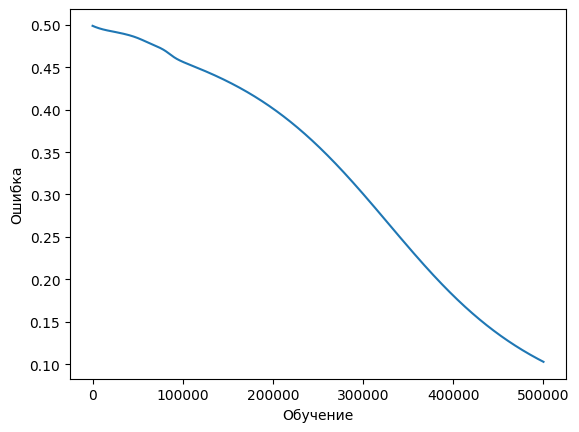

Точность нейронной сети 89.73%


In [13]:
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()  
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

In [14]:
def predict(n):
    import inspect
    layer0 = n
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    layer11 = sigmoid(np.dot(layer2, w11))
    layer3 = sigmoid(np.dot(layer11, w2))
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
   
    name = [var_name for var_name, var_val in callers_local_vars if var_val is n]
    if layer3>0.5:
        print(name[0], " is Female, probability %.01f" % (layer3*100), "%" )
    else:
        print(name[0], " is Male, probability %.01f" % ((1-layer3)*100), "%" )

In [15]:
Emily = np.array([-7, -3]) # 128 фунтов (52.35 кг), 63 дюйма (160 см)
Frank = np.array([20, 2])  # 155 pounds (63.4 кг), 68 inches (173 см)
predict((Emily)) # 0.951 - Ж
predict((Frank)) # 0.039 - М

Emily  is Female, probability 89.1 %
Frank  is Male, probability 90.4 %
